# IBM_HR_EMPLOYEE_ATTRITION


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.preprocessing import power_transform
from scipy.stats import zscore

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Download the zip file and then read it

data=pd.read_csv('HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.shape

(1470, 35)

In [5]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Target variable:
    Attrition
    
Feature variables:
    Age, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount,
    EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate,JobInvolvement, JobLevel, JobRole,
    JobSatisfaction,MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked,Over18, OverTime,
    PercentSalaryHike, PerformanceRating,RelationshipSatisfaction, StandardHours, StockOptionLevel,
    TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance,YearsAtCompany, YearsInCurrentRole,
    YearsSinceLastPromotion,YearsWithCurrManager

In [6]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There is no missing values

In [7]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

There are 9 columns having object data type:

    * Attrition     (target variable)
    * BusinessTravel 
    * Department
    * EducationField 
    * Gender
    * JobRole
    * MaritalStatus  
    * Over18 
    * OverTime

# Visualisation

                                     Visualisation of categorical data

In [8]:
data_visualization_nominal=data[['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus',
                                'Over18','OverTime']].copy()
data_visualization_nominal.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

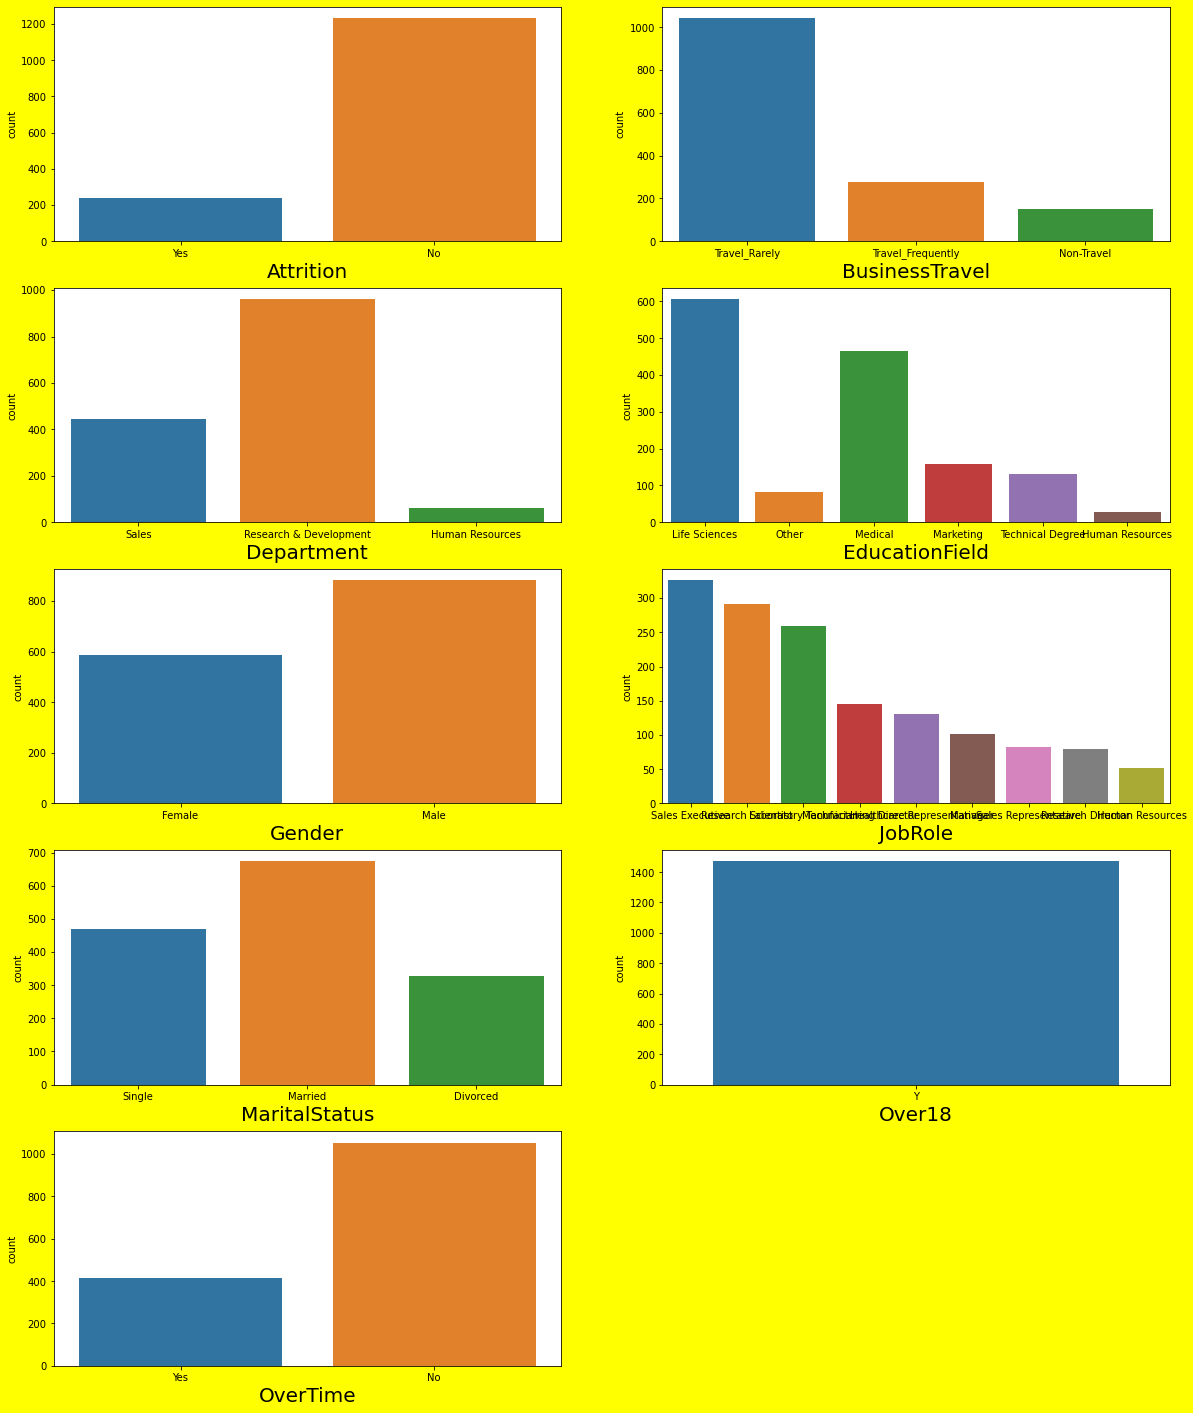

In [9]:
plt.figure(figsize=(20,25),facecolor = 'yellow')
num =1

for column in data_visualization_nominal:
    if num <=9:
        ax = plt.subplot(5,2,num)
        sns.countplot(x=column,data=data_visualization_nominal)
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()    

In [10]:
print('Count data of Attrition column:\n',data['Attrition'].value_counts())

Count data of Attrition column:
 No     1233
Yes     237
Name: Attrition, dtype: int64


                                      Visualisation of continuous data

In [11]:
data_visualization_continuous=data.drop(['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole',
                                         'MaritalStatus','Over18','OverTime'],axis=1)
data_visualization_continuous.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

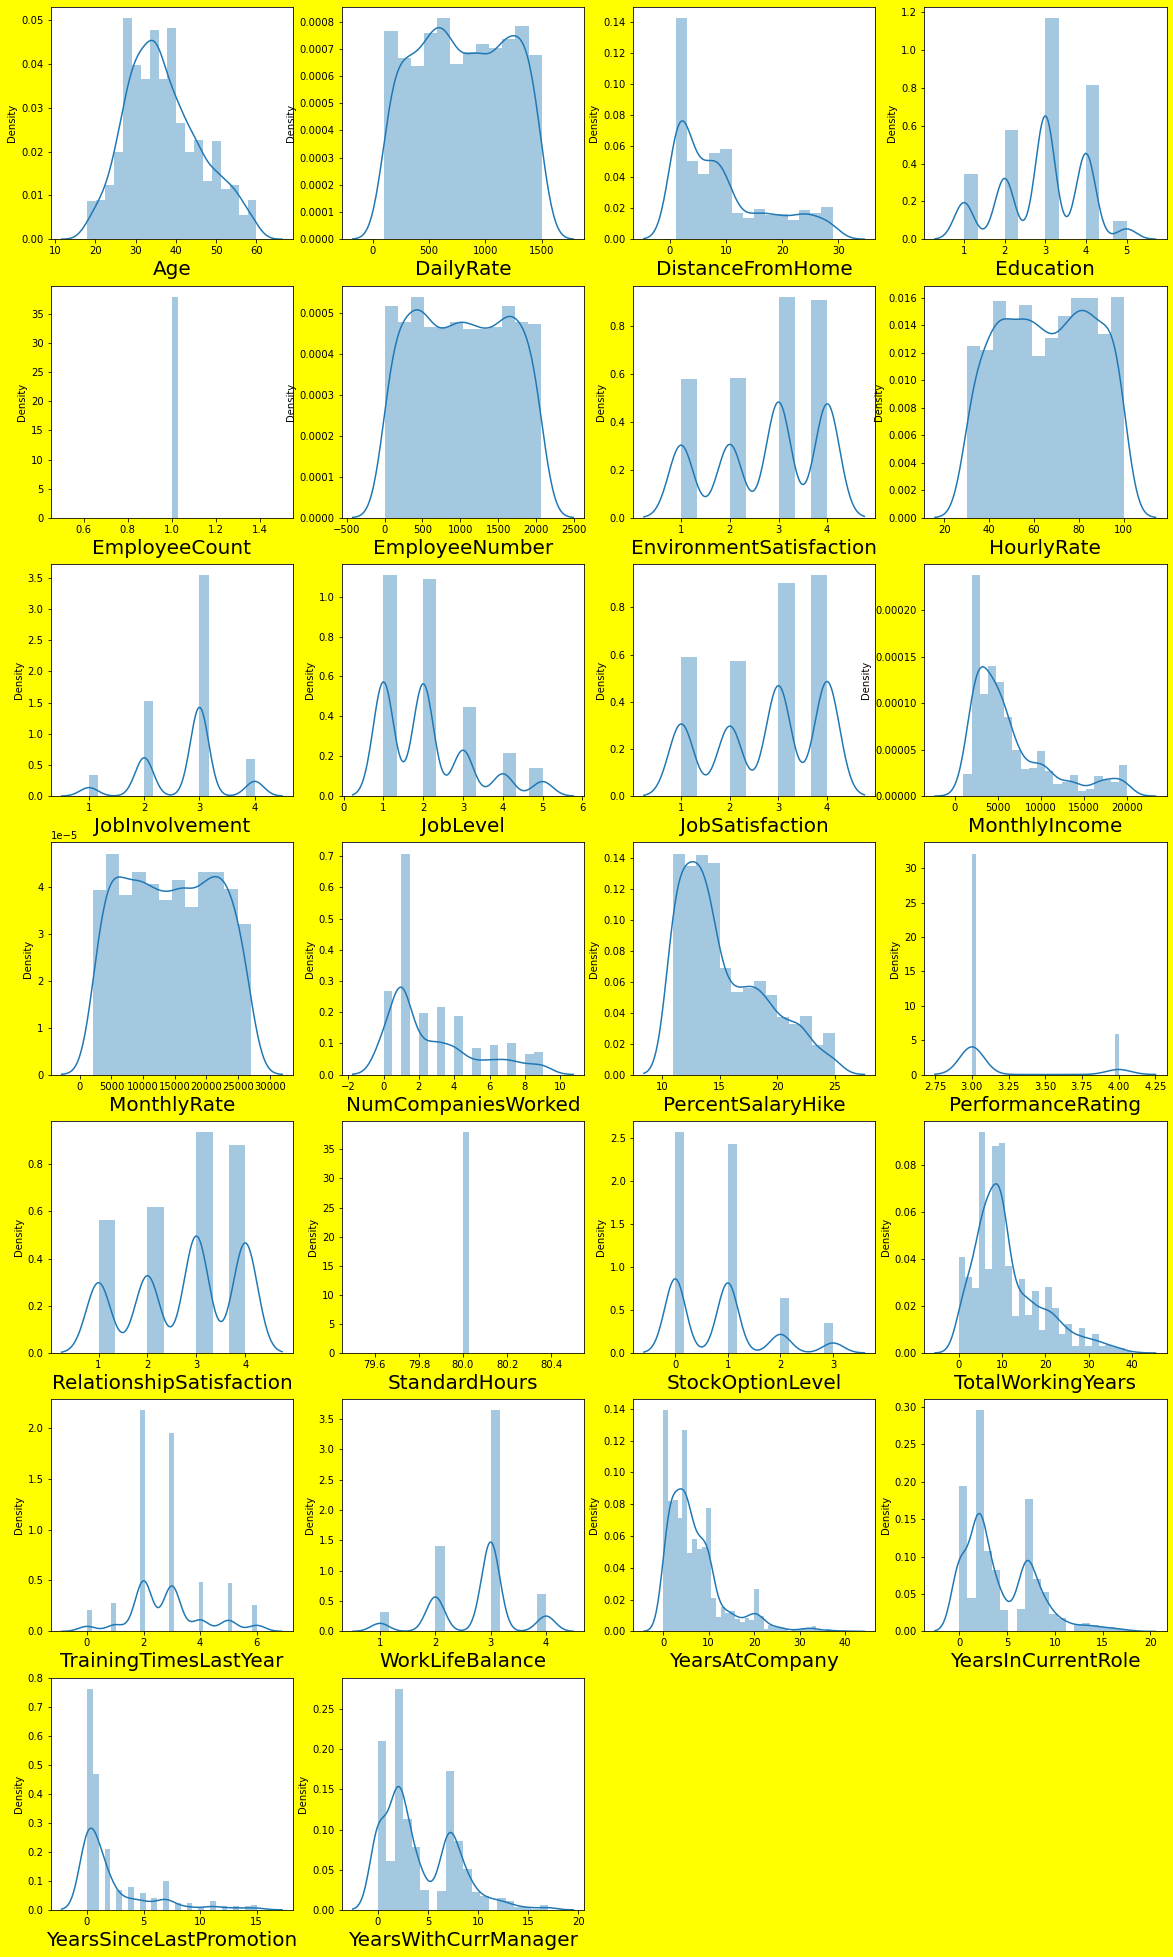

In [12]:
plt.figure(figsize=(20,35),facecolor = 'yellow')
num =1

for column in data_visualization_continuous:
    if num <=26:
        ax = plt.subplot(7,4,num)
        sns.distplot(data_visualization_continuous[column])
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()    

                                    Encode the object data types

In [13]:
enc=OrdinalEncoder()

In [14]:
for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [15]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2,1.0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0.0,1.0,279,1.0,8,1,1.0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1.0,2.0,1373,1.0,2,2,4.0,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0.0,1.0,1392,1.0,3,4,1.0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0.0,2.0,591,1.0,2,1,3.0,1,7,...,4,80,1,6,3,3,2,2,2,2


In [16]:
data.dtypes

Age                           int64
Attrition                   float64
BusinessTravel              float64
DailyRate                     int64
Department                  float64
DistanceFromHome              int64
Education                     int64
EducationField              float64
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                      float64
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                     float64
JobSatisfaction               int64
MaritalStatus               float64
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                      float64
OverTime                    float64
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours                 int64
StockOptionLevel            

Now, there is no object data type present in the dataset.

# Analysis

                                         Describe the Dataset

In [17]:
data.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


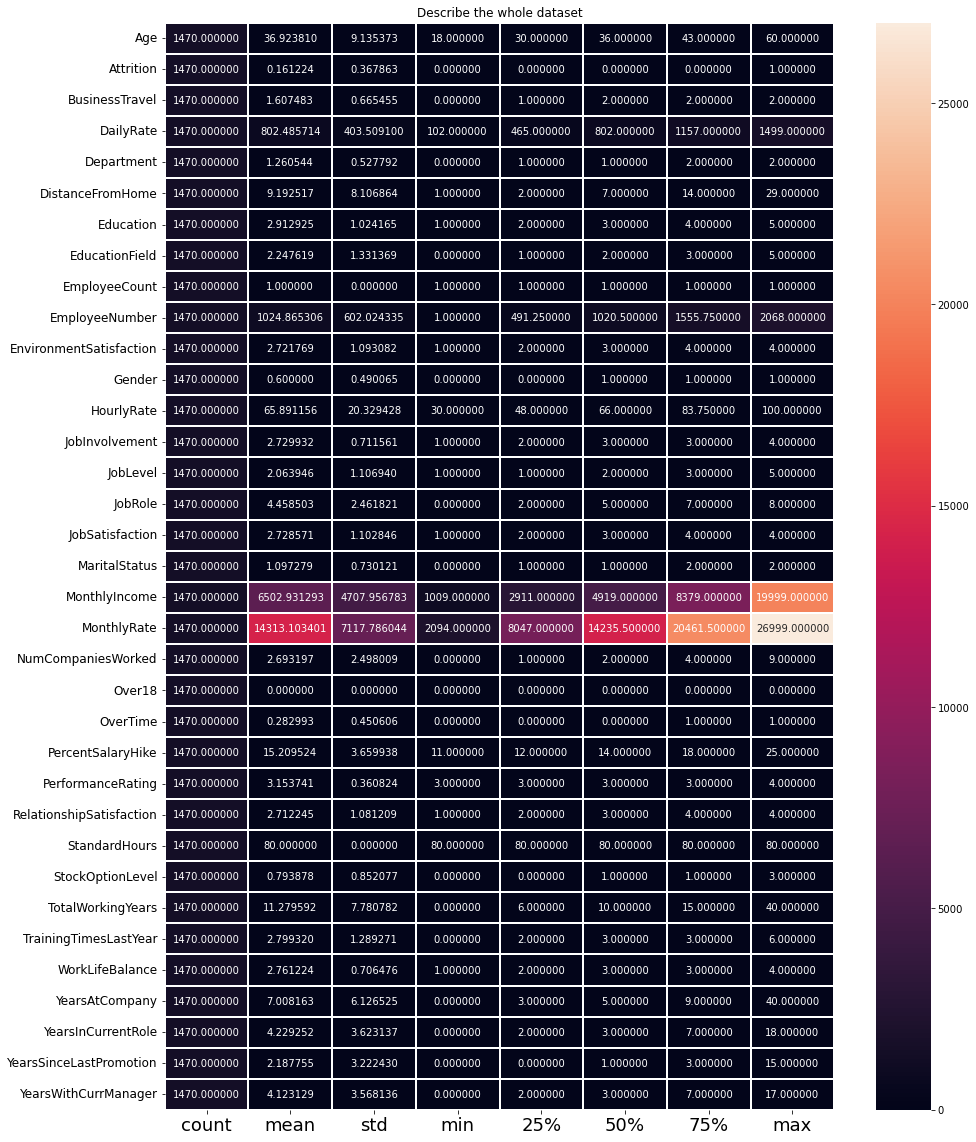

In [18]:
plt.figure(figsize=(15,20))
sns.heatmap(data.describe().transpose(),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Describe the whole dataset")
plt.show()

                                       Correlation

In [19]:
data.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,...,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,...,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,...,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


<AxesSubplot:>

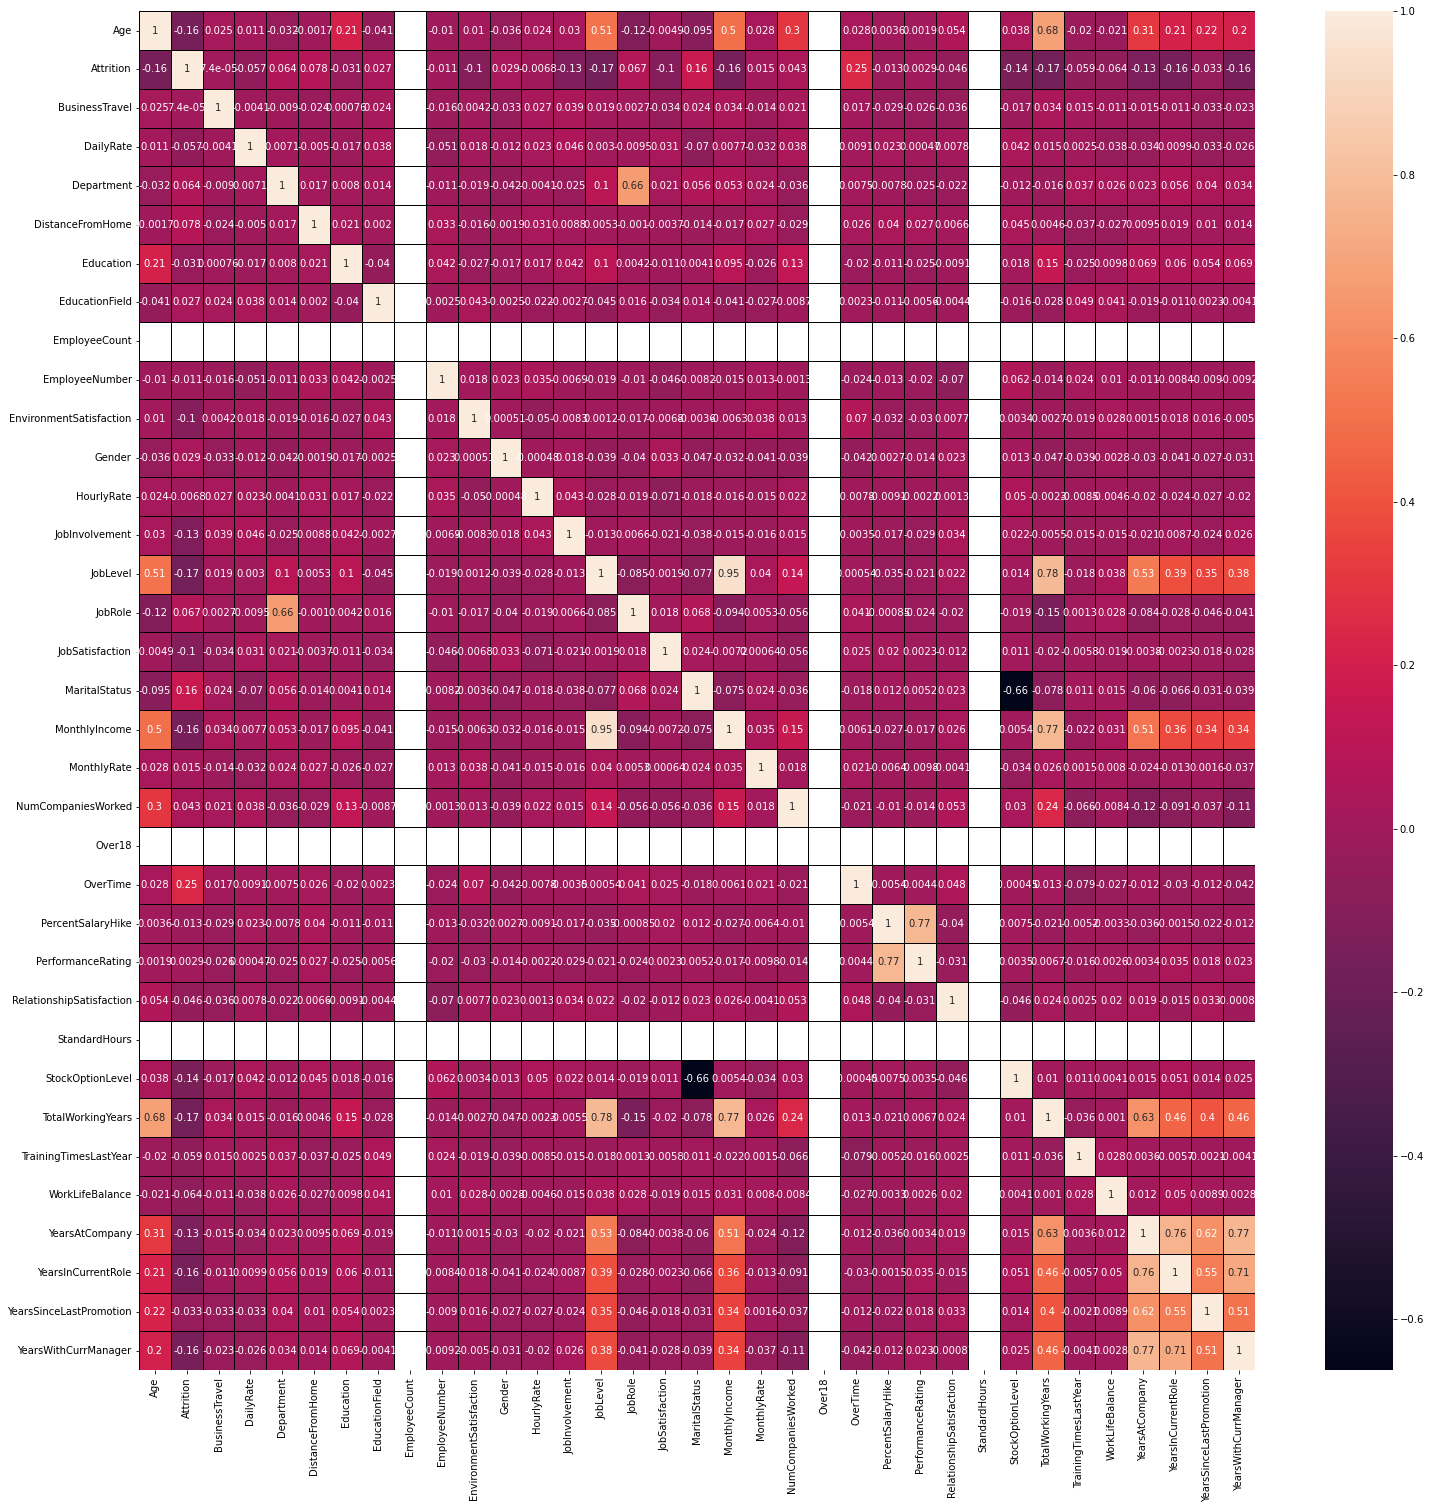

In [20]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,linecolor='black')

In [21]:
data.corr()['Attrition']

Age                        -0.159205
Attrition                   1.000000
BusinessTravel              0.000074
DailyRate                  -0.056652
Department                  0.063991
DistanceFromHome            0.077924
Education                  -0.031373
EducationField              0.026846
EmployeeCount                    NaN
EmployeeNumber             -0.010577
EnvironmentSatisfaction    -0.103369
Gender                      0.029453
HourlyRate                 -0.006846
JobInvolvement             -0.130016
JobLevel                   -0.169105
JobRole                     0.067151
JobSatisfaction            -0.103481
MaritalStatus               0.162070
MonthlyIncome              -0.159840
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
Over18                           NaN
OverTime                    0.246118
PercentSalaryHike          -0.013478
PerformanceRating           0.002889
RelationshipSatisfaction   -0.045872
StandardHours                    NaN
S

The correlation of feature variable with the target variable:
    
    * Age has 15% correltaion with the target vatiable                                      
    * BusinessTravel has 1% correltaion with the target vatiable             
    * DailyRate has 5% correltaion with the target vatiable                
    * Department has 6% correltaion with the target vatiable                 
    * DistanceFromHome has 7% correltaion with the target vatiable           
    * Education has 3% correltaion with the target vatiable               
    * EducationField has 2% correltaion with the target vatiable         
    * EmployeeNumber has 1% correltaion with the target vatiable            
    * EnvironmentSatisfaction has 10% correltaion with the target vatiable   
    * Gender has 2% correltaion with the target vatiable                  
    * HourlyRate has 0% correltaion with the target vatiable               
    * JobInvolvement has 13% correltaion with the target vatiable            
    * JobLevel has 16% correltaion with the target vatiable                 
    * JobRole has 6% correltaion with the target vatiable                    
    * JobSatisfaction has 10% correltaion with the target vatiable           
    * MaritalStatus has 16% correltaion with the target vatiable             
    * MonthlyIncome has 15% correltaion with the target vatiable              
    * MonthlyRate has 1% correltaion with the target vatiable              
    * NumCompaniesWorked has 4% correltaion with the target vatiable        
    * OverTime has 2% correltaion with the target vatiable                
    * PercentSalaryHike has 1% correltaion with the target vatiable       
    * PerformanceRating has 0% correltaion with the target vatiable          
    * RelationshipSatisfaction has 4% correltaion with the target vatiable   
    * StockOptionLevel has 13% correltaion with the target vatiable          
    * TotalWorkingYears has 17% correltaion with the target vatiable         
    * TrainingTimesLastYear has 5% correltaion with the target vatiable     
    * WorkLifeBalance has 6% correltaion with the target vatiable            
    * YearsAtCompany has 13% correltaion with the target vatiable           
    * YearsInCurrentRole has 16% correltaion with the target vatiable         
    * YearsSinceLastPromotion has 3% correltaion with the target vatiable   
    * YearsWithCurrManager has 15% correltaion with the target vatiable     
    

EmployeeCount, Over18, StandardHours have no  effect on our analysis because:
   * there is no correlation with target variable and
   * they have constant value in respective columns(ie. Yes, 1, 80)
   
So, we drop those columns from data.

In [22]:
data=data.drop(['EmployeeCount','Over18','StandardHours'],axis=1)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2,1.0,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0.0,1.0,279,1.0,8,1,1.0,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1.0,2.0,1373,1.0,2,2,4.0,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0.0,1.0,1392,1.0,3,4,1.0,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0.0,2.0,591,1.0,2,1,3.0,7,1,...,3,4,1,6,3,3,2,2,2,2


                                        Multicolinearity

Higher relation(above 0.7) in b/w independent and another independent variables:
    * JobLevel and TotalWorkingYears
    * Monthly Income and TotalWorkingYears
    * PerformanceRating and PercentSalaryHike
    * YearsAtCompany and YearsInCurrentRole
    * YearsAtCompany and YearsWithCurrManager
    * YearsInCurrentRole and YearsWithCurrManager

Relation b/w JobLevel and TotalWorkingYears


<AxesSubplot:xlabel='JobLevel', ylabel='TotalWorkingYears'>

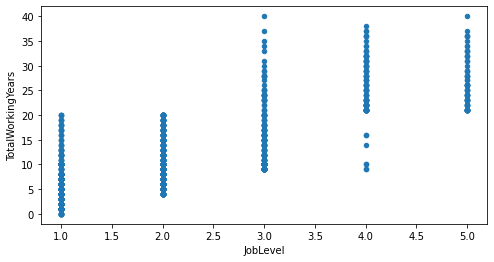

In [23]:
print("Relation b/w JobLevel and TotalWorkingYears")
data.plot(kind='scatter', x='JobLevel', y='TotalWorkingYears',figsize=(8,4))

TotalWorkingYears is 0 to 20 whose JobLevel is 1
TotalWorkingYears is 5 to 22 whose JobLevel is 2
TotalWorkingYears is 7 to 40 whose JobLevel is 3
TotalWorkingYears is 10 to 38 whose JobLevel is 4
TotalWorkingYears is 23 to 40 whose JobLevel is 5

Relation b/w Monthly Income and TotalWorkingYears


<AxesSubplot:xlabel='TotalWorkingYears', ylabel='MonthlyIncome'>

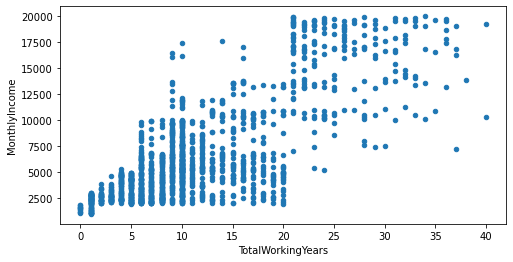

In [35]:
print("Relation b/w Monthly Income and TotalWorkingYears")
data.plot(kind='scatter', x='TotalWorkingYears', y='MonthlyIncome',figsize=(8,4))

As income Working year increases Income also goes on increasing.

Relation b/w PerformanceRating and PercentSalaryHike


<AxesSubplot:xlabel='PerformanceRating', ylabel='PercentSalaryHike'>

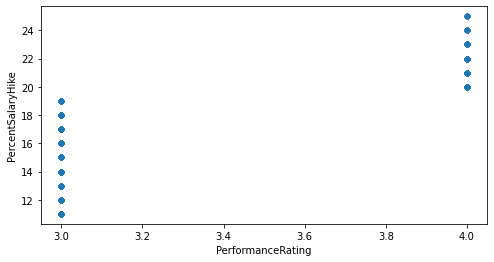

In [27]:
print("Relation b/w PerformanceRating and PercentSalaryHike")
data.plot(kind='scatter', x='PerformanceRating', y='PercentSalaryHike',figsize=(8,4))

SalaryHike increase to 19% while Performace rate is 3
SalaryHike increase from 20% while Performace rate is 4

Relation b/w YearsAtCompany and YearsinCurrentRole


<AxesSubplot:xlabel='YearsAtCompany', ylabel='YearsInCurrentRole'>

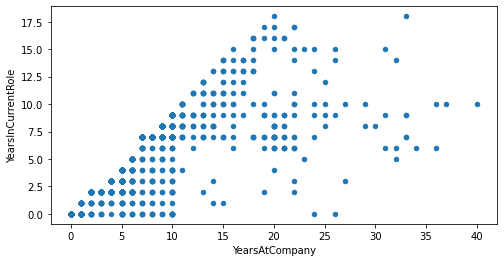

In [29]:
print("Relation b/w YearsAtCompany and YearsinCurrentRole")
data.plot(kind='scatter', x='YearsAtCompany', y='YearsInCurrentRole',figsize=(8,4))

They both are positively related with each other

Relation b/w YearsAtCompany and YearsWithCurrManager


<AxesSubplot:xlabel='YearsAtCompany', ylabel='YearsWithCurrManager'>

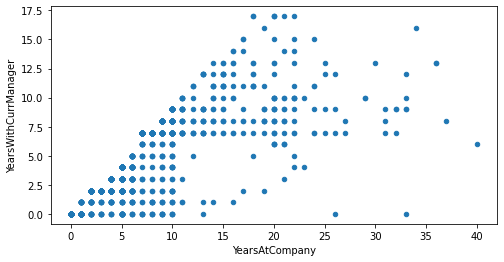

In [32]:
print("Relation b/w YearsAtCompany and YearsWithCurrManager")
data.plot(kind='scatter', x='YearsAtCompany', y='YearsWithCurrManager',figsize=(8,4))

They both are positively related with each other

Relation b/w YearsInCurrentRole and YearswithCurrManager


<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='YearsWithCurrManager'>

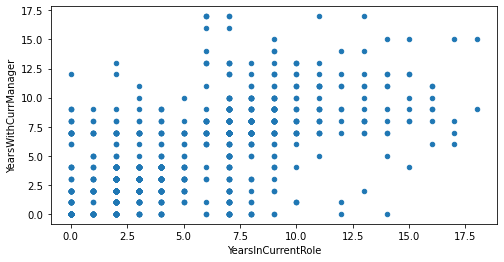

In [34]:
print("Relation b/w YearsInCurrentRole and YearswithCurrManager")
data.plot(kind='scatter', x='YearsInCurrentRole', y='YearsWithCurrManager',figsize=(8,4))

In starting there is good relation with each other ,in mid it is stronger but goes week as value goes on increasing

                                               Outliers

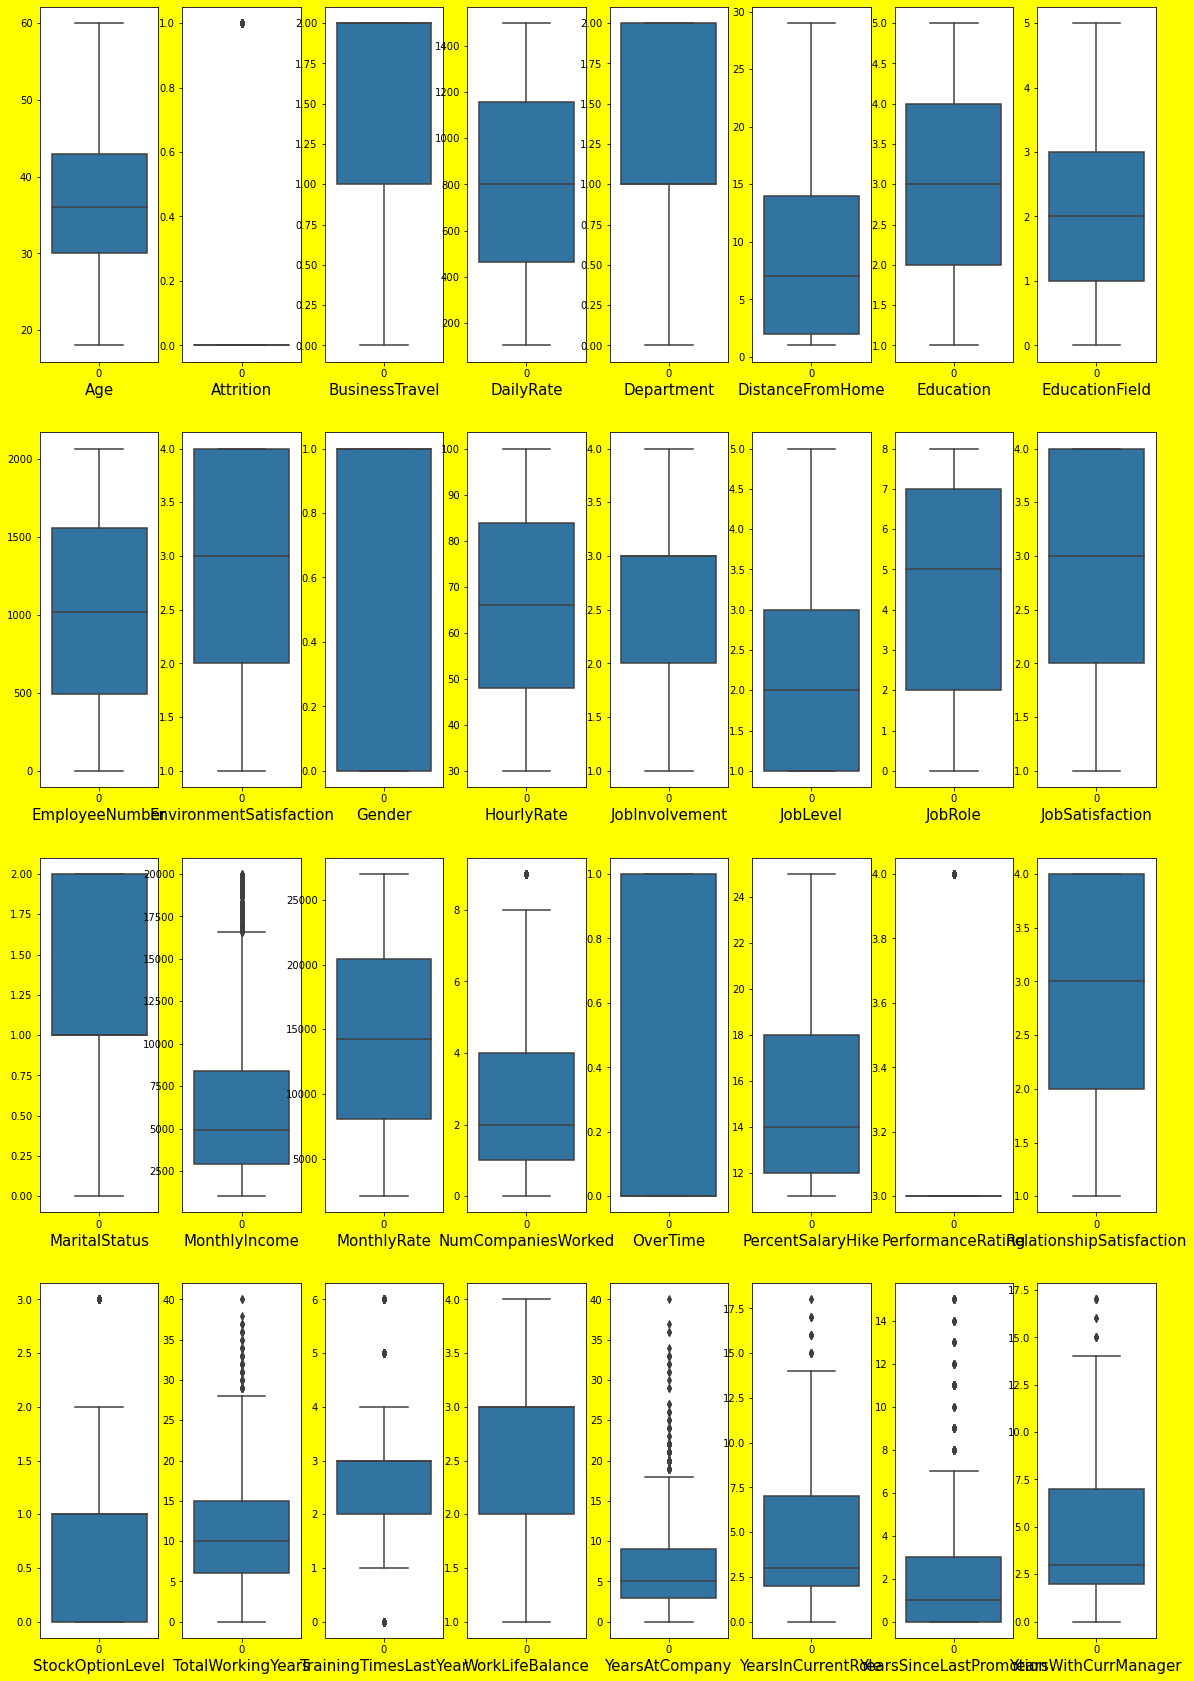

In [37]:
plt.figure(figsize=(20,30),facecolor='yellow')
number = 1

for column in data:
    if number <=32:
        plt.subplot(4,8,number)
        ax = sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=15)
       
    number+=1
plt.show()    

Outliers are present in eleven of the columns that are:
    
    * MonthlyIncome
    * NumCompaniesWorked                           
    * PerformanceRating           
    * RelationshipSatisfaction
    * StockOptionLevel           
    * TotalWorkingYears          
    * TrainingTimesLastYear      
    * YearsAtCompany             
    * YearsInCurrentRole         
    * YearsSinceLastPromotion    
    * YearsWithCurrManager     

                                            Skewness

In [38]:
data.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
W

Take threshold range of the skewness is (-0.5,0.5)

Skewness is present in the columns:
    * DistanceFromHome
    * JobLevel 
    * MonthlyIncome
    * NumCompaniesWorked 
    * PercentSalaryHike
    * PerformanceRating           
    * StockOptionLevel           
    * TotalWorkingYears          
    * TrainingTimesLastYear 
    * WorkLifeBalance 
    * YearsAtCompany             
    * YearsInCurrentRole         
    * YearsSinceLastPromotion    
    * YearsWithCurrManager     

                                     Variance Inflation Factor

In [39]:
x=data.drop(['Attrition'],axis=1)
y=data['Attrition']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [41]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,2.054226,Age
1,1.016808,BusinessTravel
2,1.026401,DailyRate
3,1.942165,Department
4,1.018096,DistanceFromHome
5,1.065295,Education
6,1.016240,EducationField
7,1.022699,EmployeeNumber
8,1.018022,EnvironmentSatisfaction
9,1.020038,Gender


Two columns have VIF greater than 5 ,so first remove one of the column having highest VIF.

Drop JobLevel column from the data

In [42]:
data=data.drop(['JobLevel'],axis=1)

In [43]:
x=data.drop(['Attrition'],axis=1)
y=data['Attrition']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [44]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,2.052543,Age
1,1.015286,BusinessTravel
2,1.026098,DailyRate
3,1.849243,Department
4,1.014345,DistanceFromHome
5,1.065267,Education
6,1.015587,EducationField
7,1.022384,EmployeeNumber
8,1.017349,EnvironmentSatisfaction
9,1.019711,Gender


Now,VIF value is less than 5, it means there is no multicollineariy exist in the data

                                     Removing Outliers

In [45]:
x=data.drop(['Attrition'],axis=1)
y=data['Attrition']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [46]:
z=np.abs(zscore(x))

threshold=3

print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([29, 28, 26, 28, 27, 28, 23, 23, 26, 28, 27, 28, 29, 23, 26, 28, 29,
       28, 23, 29, 26, 27, 28, 27, 29, 26, 28, 23, 26, 27, 28, 28, 29, 23,
       26, 26, 28, 28, 23, 27, 26, 26, 28, 26, 29, 28, 26, 23, 26, 28, 29,
       23, 29, 26, 28, 

In [47]:
data_new=data[(z<3).all(axis=1)]

In [48]:
print("Old data frame:",data.shape)
print("New data frame:",data_new.shape)
print("Total dropped rows:",data.shape[0]-data_new.shape[0])

Old data frame: (1470, 31)
New data frame: (1387, 31)
Total dropped rows: 83


In [49]:
data_loss=(1470-1387)/1470*100
print(data_loss,'%')

5.646258503401361 %


There is 5% of loss while removing an outliers which can be acceptable.

                                     Removing Skewness

In [50]:
data_new['DistanceFromHome']=np.sqrt(data_new['DistanceFromHome'])
data_new['MonthlyIncome']=np.sqrt(data_new['MonthlyIncome'])
data_new['NumCompaniesWorked']=np.sqrt(data_new['NumCompaniesWorked'])
data_new['PercentSalaryHike']=np.sqrt(data_new['PercentSalaryHike'])
data_new['PerformanceRating']=np.sqrt(data_new['PerformanceRating'])
data_new['StockOptionLevel']=np.sqrt(data_new['StockOptionLevel'])
data_new['TotalWorkingYears']=np.sqrt(data_new['TotalWorkingYears'])
data_new['TrainingTimesLastYear']=np.sqrt(data_new['TrainingTimesLastYear'])
data_new['WorkLifeBalance']=np.sqrt(data_new['WorkLifeBalance'])
data_new['YearsAtCompany']=np.sqrt(data_new['YearsAtCompany'])
data_new['YearsInCurrentRole']=np.sqrt(data_new['YearsInCurrentRole'])
data_new['YearsSinceLastPromotion']=np.sqrt(data_new['YearsSinceLastPromotion'])
data_new['YearsWithCurrManager']=np.sqrt(data_new['YearsWithCurrManager'])

In [51]:
data_new.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.394018
Education                  -0.289024
EducationField              0.544868
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               0.950248
MonthlyRate                 0.030596
NumCompaniesWorked          0.039150
OverTime                    0.954751
PercentSalaryHike           0.636544
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.063863
TotalWorkingYears           0.042345
TrainingTimesLastYear      -1.181432
WorkLifeBalance            -1.039479
Y

Still skewness is present in some of the columns,so we remove all those columns from the dataset
   
    * JobInvolvement
    * MonthlyIncome 
    * PercentSalaryHike          
    * PerformanceRating
    * TrainingTimesLastYear      
    * WorkLifeBalance 
    * YearsSinceLastPromotion

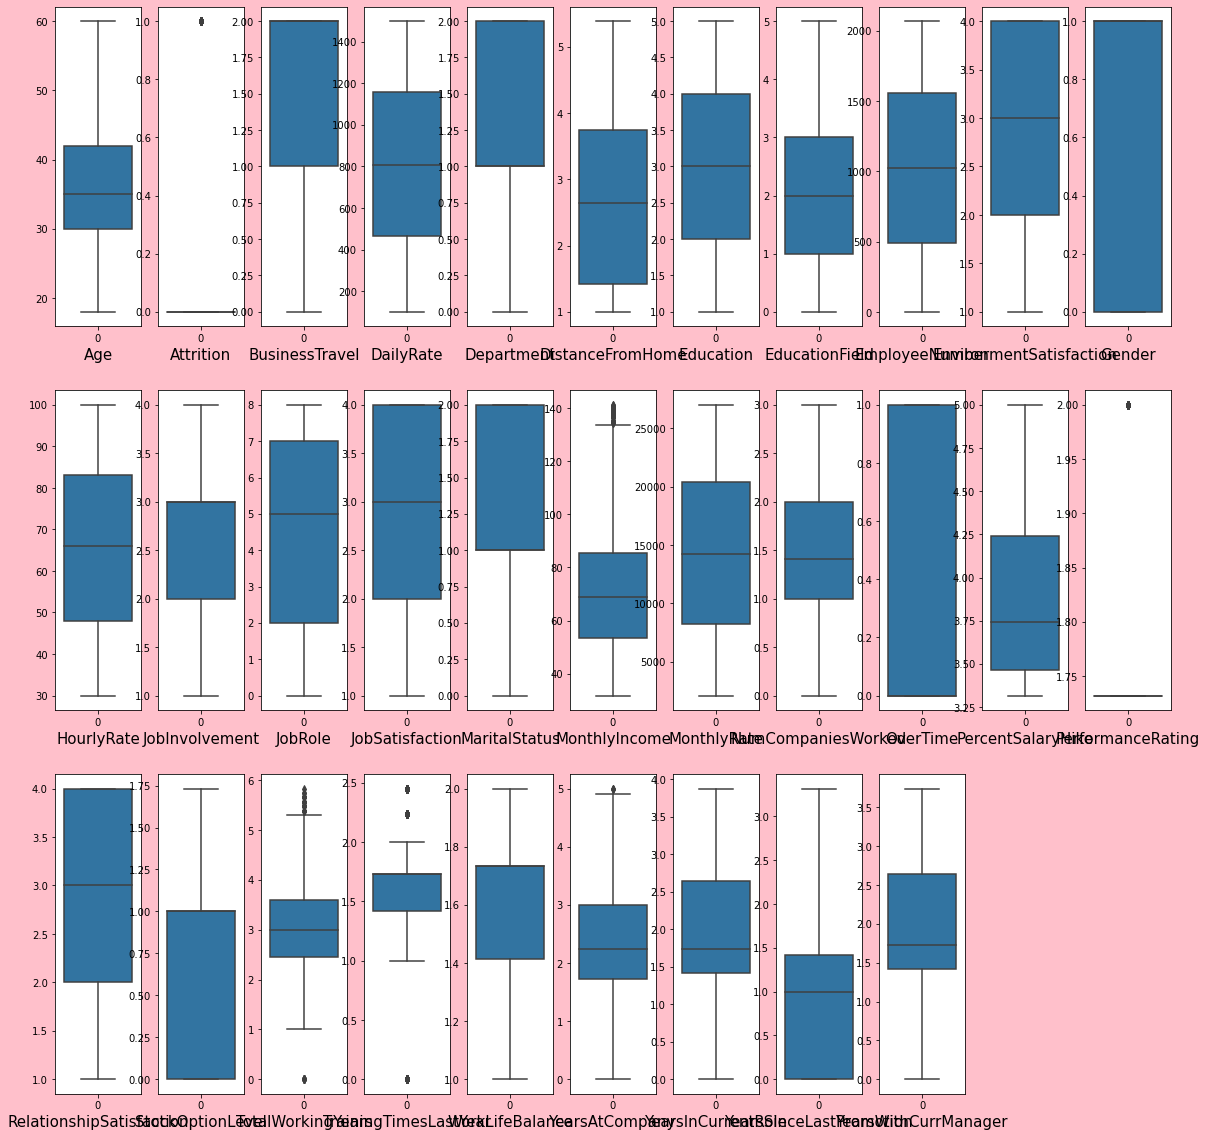

In [53]:
plt.figure(figsize=(20,20),facecolor='pink')
number = 1

for column in data_new:
    if number <=31:
        plt.subplot(3,11,number)
        ax = sns.boxplot(data=data_new[column])
        plt.xlabel(column,fontsize=15)
       
    number+=1
plt.show()    

Still outliers are present in the columns so we droped them:

    * MonthlyIncome
    * PerformanceRating
    * TotalWorkingYears 
    * TrainingTimesLastYear
    * YearsAtCompany

Drop all the column which have still outliers and skewness in it

In [56]:
data_new=data_new.drop({'JobInvolvement','MonthlyIncome','PercentSalaryHike','PerformanceRating','TotalWorkingYears',
                       'TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsSinceLastPromotion'},axis=1)
data_new.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,RelationshipSatisfaction,StockOptionLevel,YearsInCurrentRole,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1.000000,2,1.0,1,2,...,7.0,4,2.0,19479,2.828427,1.0,1,0.0,2.000000,2.236068
1,49,0.0,1.0,279,1.0,2.828427,1,1.0,2,3,...,6.0,2,1.0,24907,1.000000,0.0,4,1.0,2.645751,2.645751
2,37,1.0,2.0,1373,1.0,1.414214,2,4.0,4,4,...,2.0,3,2.0,2396,2.449490,1.0,2,0.0,0.000000,0.000000
3,33,0.0,1.0,1392,1.0,1.732051,4,1.0,5,4,...,6.0,3,1.0,23159,1.000000,1.0,3,0.0,2.645751,0.000000
4,27,0.0,2.0,591,1.0,1.414214,1,3.0,7,1,...,2.0,2,1.0,16632,3.000000,0.0,4,1.0,1.414214,1.414214


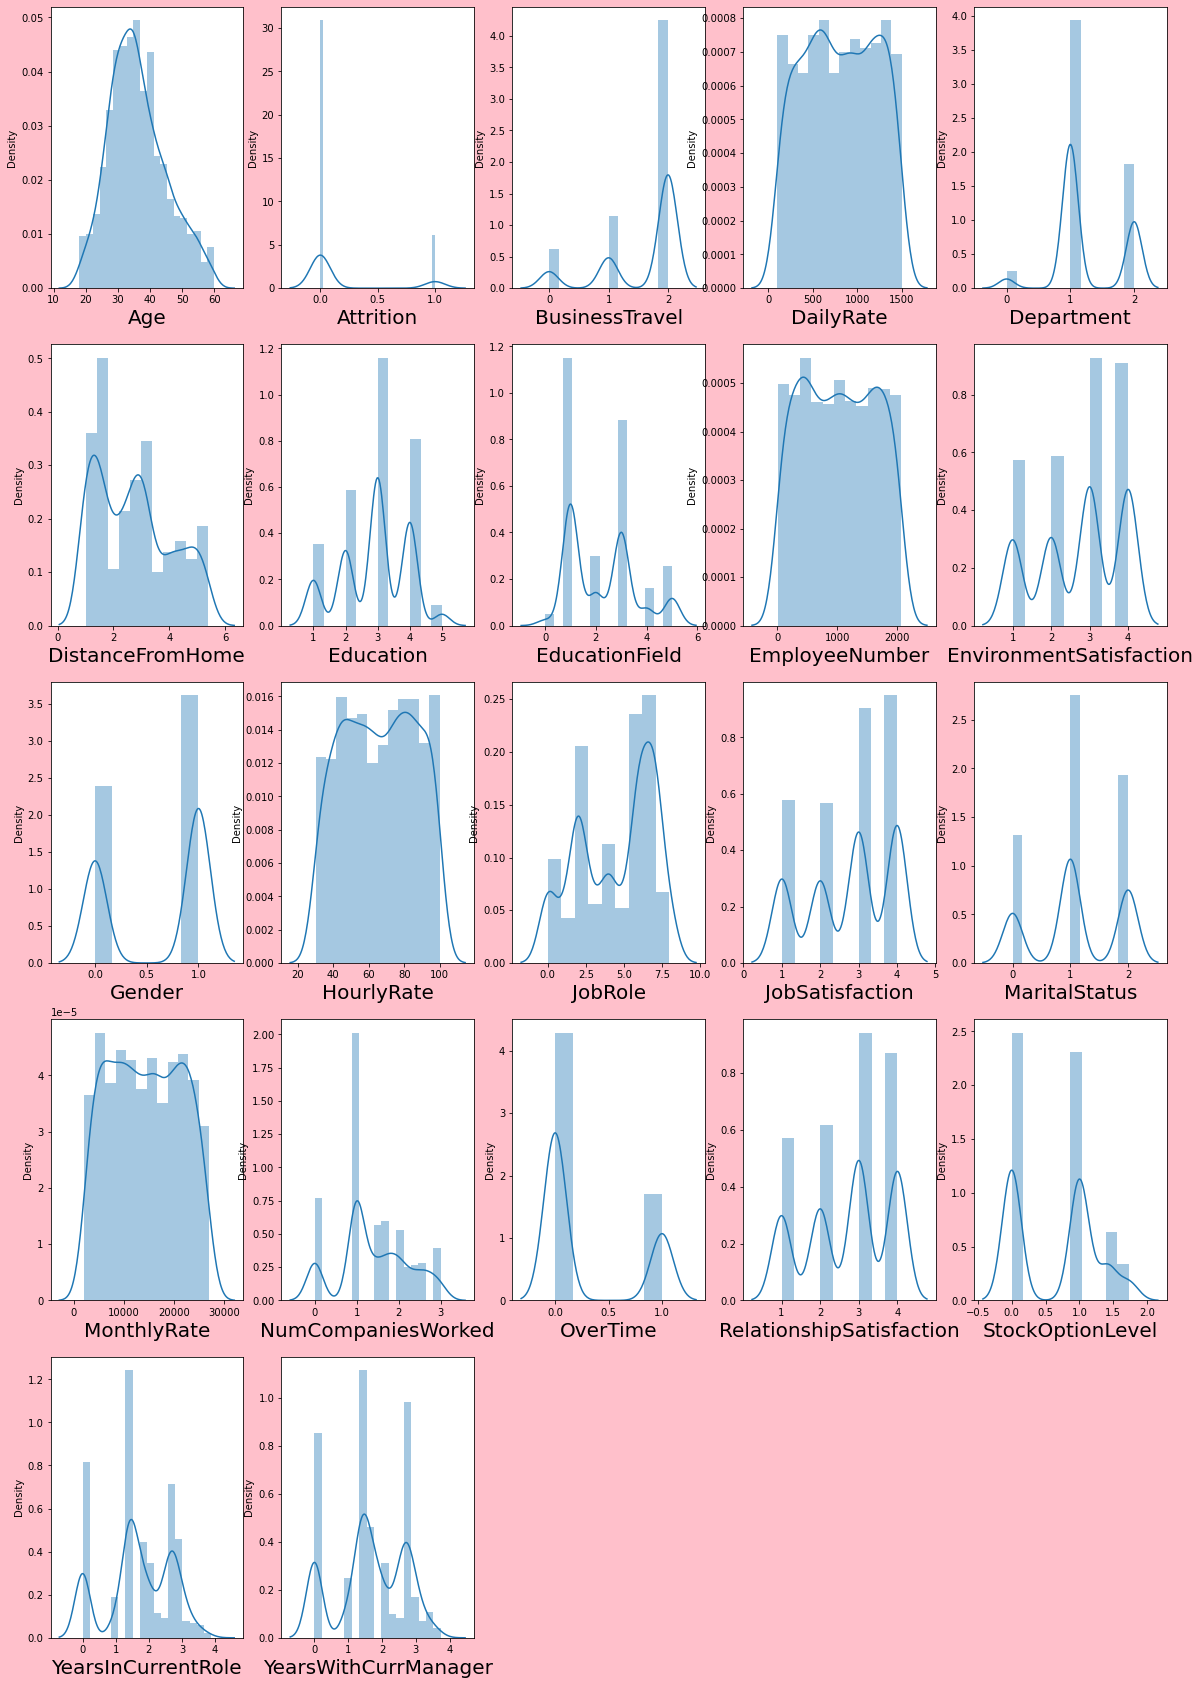

In [57]:
plt.figure(figsize=(20,30),facecolor = 'pink')
num =1

for column in data_new:
    if num <=22:
        ax = plt.subplot(5,5,num)
        sns.distplot(data_new[column])
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()  

Now the dataset is ready to build model because:
    * the data is normally distibuted
    * there is no ouliers present
    * data is not skewed

# Model Testing

In [133]:
x=data_new.drop(['Attrition'],axis=1)
y=data_new['Attrition']

In [134]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

                                         Logistic Regression

In [135]:
lr=LogisticRegression()

In [136]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",round(accuracy_score(y_train,pred_train)*100,1))
    print("Testing accuracy score:",round(accuracy_score(y_test,pred_test)*100,1))
    print('\n')

The model perform very well
random state 0
Training accuracy score: 86.4
Testing accuracy score: 87.8


The model perform very well
random state 1
Training accuracy score: 87.1
Testing accuracy score: 81.7


The model perform very well
random state 2
Training accuracy score: 86.4
Testing accuracy score: 87.1


The model perform very well
random state 3
Training accuracy score: 85.5
Testing accuracy score: 89.6


The model perform very well
random state 4
Training accuracy score: 86.7
Testing accuracy score: 84.5


The model perform very well
random state 5
Training accuracy score: 87.5
Testing accuracy score: 82.4


The model perform very well
random state 6
Training accuracy score: 85.2
Testing accuracy score: 89.9


The model perform very well
random state 7
Training accuracy score: 86.3
Testing accuracy score: 84.5


The model perform very well
random state 8
Training accuracy score: 86.8
Testing accuracy score: 85.3


The model perform very well
random state 9
Training accuracy sco

In [137]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.20,random_state=48)  

In [138]:
lr.fit(x_train,y_train)

LogisticRegression()

In [139]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 91.72661870503596


In [140]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[241   6]
 [ 17  14]]


In [141]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       247
         1.0       0.70      0.45      0.55        31

    accuracy                           0.92       278
   macro avg       0.82      0.71      0.75       278
weighted avg       0.91      0.92      0.91       278



In [142]:
for j in range(2,10):
    cv_score=cross_val_score(lr,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.8637299300123507


At cross fold 3 the cv score is 0.8586840325501232


At cross fold 4 the cv score is 0.8586917592577169


At cross fold 5 the cv score is 0.8586759473287795


At cross fold 6 the cv score is 0.8579638752052544


At cross fold 7 the cv score is 0.8586801250117834


At cross fold 8 the cv score is 0.863015746462029


At cross fold 9 the cv score is 0.8586836102965135




In [143]:
lrscore=cross_val_score(lr,x_scaled,y,cv=2)
lrc=lrscore.mean()
print('cross val score:',lrc*100)

cross val score: 86.37299300123506


                                   K Neighbors Classifier

In [144]:
knn= KNeighborsClassifier()

In [145]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",round(accuracy_score(y_train,pred_train)*100,1))
    print("Testing accuracy score:",round(accuracy_score(y_test,pred_test)*100,1))
    print('\n')

The model perform very well
random state 0
Training accuracy score: 86.7
Testing accuracy score: 83.5


The model perform very well
random state 1
Training accuracy score: 87.5
Testing accuracy score: 82.7


The model perform very well
random state 2
Training accuracy score: 87.3
Testing accuracy score: 85.3


The model perform very well
random state 3
Training accuracy score: 86.5
Testing accuracy score: 84.5


The model perform very well
random state 4
Training accuracy score: 86.4
Testing accuracy score: 83.8


The model perform very well
random state 5
Training accuracy score: 87.1
Testing accuracy score: 81.7


The model perform very well
random state 6
Training accuracy score: 86.8
Testing accuracy score: 87.1


The model perform very well
random state 7
Training accuracy score: 87.7
Testing accuracy score: 83.5


The model perform very well
random state 8
Training accuracy score: 87.6
Testing accuracy score: 84.2


The model perform very well
random state 9
Training accuracy sco

In [146]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.20,random_state=56) 

In [147]:
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 87.41007194244604


In [148]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[236   3]
 [ 32   7]]


In [149]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       239
         1.0       0.70      0.18      0.29        39

    accuracy                           0.87       278
   macro avg       0.79      0.58      0.61       278
weighted avg       0.86      0.87      0.84       278



In [150]:
for j in range(2,10):
    cv_score=cross_val_score(knn,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.8377818946983212


At cross fold 3 the cv score is 0.8406652143153224


At cross fold 4 the cv score is 0.842100331495394


At cross fold 5 the cv score is 0.8449964937797054


At cross fold 6 the cv score is 0.8421095188336567


At cross fold 7 the cv score is 0.840660735133097


At cross fold 8 the cv score is 0.8442586871304232


At cross fold 9 the cv score is 0.8442722152399571




In [151]:
knnscore=cross_val_score(knn,x_scaled,y,cv=5)
knnc=knnscore.mean()
print('cross val score:',knnc*100)

cross val score: 84.49964937797054


                                        Decision Tree Classifier

In [152]:
clf=DecisionTreeClassifier()

In [153]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    clf.fit(x_train,y_train)
    pred_train=clf.predict(x_train)
    pred_test=clf.predict(x_test)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",round(accuracy_score(y_train,pred_train)*100,1))
    print("Testing accuracy score:",round(accuracy_score(y_test,pred_test)*100,1))
    print('\n')

The model perform very well
random state 0
Training accuracy score: 100.0
Testing accuracy score: 73.0


The model perform very well
random state 1
Training accuracy score: 100.0
Testing accuracy score: 77.0


The model perform very well
random state 2
Training accuracy score: 100.0
Testing accuracy score: 80.9


The model perform very well
random state 3
Training accuracy score: 100.0
Testing accuracy score: 73.0


The model perform very well
random state 4
Training accuracy score: 100.0
Testing accuracy score: 74.5


The model perform very well
random state 5
Training accuracy score: 100.0
Testing accuracy score: 73.4


The model perform very well
random state 6
Training accuracy score: 100.0
Testing accuracy score: 79.9


The model perform very well
random state 7
Training accuracy score: 100.0
Testing accuracy score: 75.2


The model perform very well
random state 8
Training accuracy score: 100.0
Testing accuracy score: 79.5


The model perform very well
random state 9
Training acc

In [154]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = 76)

In [155]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 84.17266187050359


In [156]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[218  24]
 [ 20  16]]


In [157]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91       242
         1.0       0.40      0.44      0.42        36

    accuracy                           0.84       278
   macro avg       0.66      0.67      0.66       278
weighted avg       0.85      0.84      0.85       278



In [158]:
for j in range(2,10):
    cv_score=cross_val_score(clf,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.5668573341484004


At cross fold 3 the cv score is 0.7476851202553146


At cross fold 4 the cv score is 0.7707288734154021


At cross fold 5 the cv score is 0.7736436121860635


At cross fold 6 the cv score is 0.7779550430412501


At cross fold 7 the cv score is 0.7527391647994663


At cross fold 8 the cv score is 0.7592394193076871


At cross fold 9 the cv score is 0.7282036959456315




In [159]:
clfscore=cross_val_score(clf,x_scaled,y,cv=6)
clfc=clfscore.mean()
print('cross val score:',clfc*100)

cross val score: 76.71325322187391


                                       Random Forest Classifier

In [160]:
rfc=RandomForestClassifier()

In [161]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    rfc.fit(x_train,y_train)
    pred_train=rfc.predict(x_train)
    pred_test=rfc.predict(x_test)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",round(accuracy_score(y_train,pred_train)*100,1))
    print("Testing accuracy score:",round(accuracy_score(y_test,pred_test)*100,1))
    print('\n')

The model perform very well
random state 0
Training accuracy score: 100.0
Testing accuracy score: 83.8


The model perform very well
random state 1
Training accuracy score: 100.0
Testing accuracy score: 84.5


The model perform very well
random state 2
Training accuracy score: 100.0
Testing accuracy score: 85.6


The model perform very well
random state 3
Training accuracy score: 100.0
Testing accuracy score: 85.3


The model perform very well
random state 4
Training accuracy score: 100.0
Testing accuracy score: 87.1


The model perform very well
random state 5
Training accuracy score: 100.0
Testing accuracy score: 83.8


The model perform very well
random state 6
Training accuracy score: 100.0
Testing accuracy score: 88.8


The model perform very well
random state 7
Training accuracy score: 100.0
Testing accuracy score: 84.5


The model perform very well
random state 8
Training accuracy score: 100.0
Testing accuracy score: 86.7


The model perform very well
random state 9
Training acc

In [162]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = 48)

In [163]:
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 90.28776978417267


In [164]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[245   2]
 [ 25   6]]


In [165]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95       247
         1.0       0.75      0.19      0.31        31

    accuracy                           0.90       278
   macro avg       0.83      0.59      0.63       278
weighted avg       0.89      0.90      0.88       278



In [166]:
for j in range(2,10):
    cv_score=cross_val_score(rfc,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.8478735481617325


At cross fold 3 the cv score is 0.8522029925917615


At cross fold 4 the cv score is 0.8529239059819094


At cross fold 5 the cv score is 0.8507674726644676


At cross fold 6 the cv score is 0.8493245260486639


At cross fold 7 the cv score is 0.852933498662142


At cross fold 8 the cv score is 0.8536434456182314


At cross fold 9 the cv score is 0.8543732253409673




In [167]:
rfcscore=cross_val_score(rfc,x_scaled,y,cv=8)
rfcc=rfcscore.mean()
print('cross val score:',rfcc*100)

cross val score: 85.07698823998405


                                             SVC

In [168]:
svc=SVC()

In [169]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    svc.fit(x_train,y_train)
    pred_train=svc.predict(x_train)
    pred_test=svc.predict(x_test)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",round(accuracy_score(y_train,pred_train)*100,1))
    print("Testing accuracy score:",round(accuracy_score(y_test,pred_test)*100,1))
    print('\n')

The model perform very well
random state 0
Training accuracy score: 90.5
Testing accuracy score: 86.0


The model perform very well
random state 1
Training accuracy score: 91.3
Testing accuracy score: 86.3


The model perform very well
random state 2
Training accuracy score: 90.5
Testing accuracy score: 86.3


The model perform very well
random state 3
Training accuracy score: 90.5
Testing accuracy score: 87.4


The model perform very well
random state 4
Training accuracy score: 90.4
Testing accuracy score: 87.1


The model perform very well
random state 5
Training accuracy score: 91.2
Testing accuracy score: 84.2


The model perform very well
random state 6
Training accuracy score: 90.5
Testing accuracy score: 90.3


The model perform very well
random state 7
Training accuracy score: 90.4
Testing accuracy score: 85.3


The model perform very well
random state 8
Training accuracy score: 90.5
Testing accuracy score: 85.3


The model perform very well
random state 9
Training accuracy sco

In [170]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = 6)

In [171]:
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 90.28776978417267


In [172]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[239   1]
 [ 26  12]]


In [173]:
clr=classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       240
         1.0       0.92      0.32      0.47        38

    accuracy                           0.90       278
   macro avg       0.91      0.66      0.71       278
weighted avg       0.90      0.90      0.88       278



In [174]:
for j in range(2,10):
    cv_score=cross_val_score(svc,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.8557986202078421


At cross fold 3 the cv score is 0.8608563262990909


At cross fold 4 the cv score is 0.8586896770002166


At cross fold 5 the cv score is 0.8608575955120381


At cross fold 6 the cv score is 0.8572454844006568


At cross fold 7 the cv score is 0.8622912542510532


At cross fold 8 the cv score is 0.8586846388944256


At cross fold 9 the cv score is 0.8579667644183773




In [175]:
svcscore=cross_val_score(svc,x_scaled,y,cv=7)
svcc=svcscore.mean()
print('cross val score:',svcc*100)

cross val score: 86.22912542510532


The accuracy_score and cv_score of all the models:
    
    * Logistic Regression
            accuracy_score: 91.72
            cv_score: 86.37
                
    * K Neighbors Classifier
            accuracy_score: 87.41
            cv_score:84.49
                
    * Decision Tree Classifier
            accuracy_score: 84.17
            cv_score: 76.71
                
    * Random Forest Classifier
            accuracy_score: 90.28
            cv_score: 85.07
                
    * SVC
           accuracy_score: 90.28
            cv_score: 86.22
                
All the models are good but Logistic Regression gives better result in all of the models,so we select that model for 
hyper parameter tuning             

# Modeling of Logistic Regression

                                      Hyper parameter tuning

In [181]:
lr=LogisticRegression()

In [182]:
parameter={
          'penalty' : ['l1','l2','elasticent','none'],
          'solver'  : ['newton-cg','lbfgs','liblinear','sag'],
          'C'       : [100,10,1.0,0.1,0.01]
           }

In [183]:
GCV=GridSearchCV(lr,parameter,cv=5,n_jobs=-1)
GCV.fit(x_train,y_train)
GCV.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [184]:
clf = LogisticRegression(C=0.1,penalty='l2',solver='newton-cg')
clf.fit(x_train,y_train)

pred = clf.predict(x_test)
accuracy_score(y_test,pred)*100

89.92805755395683

In [ ]:
Accuracy score of the model is 91.72

In [ ]:
                                  Plot ROC_AUC curve and find the AUC value

In [188]:
fpr,tpr,thresholds = roc_curve(y_test,pred) 

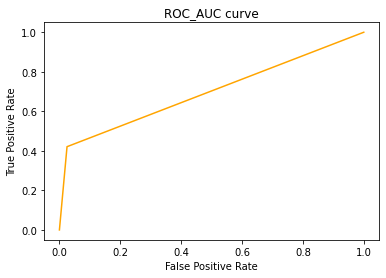

In [189]:
plt.plot(fpr,tpr,color='orange',label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC curve')                                                                                
plt.show()

In [190]:
auc_score = roc_auc_score(y_test,pred)*100
print("AUC_score",auc_score)

AUC_score 69.80263157894737


Accuracy score is 91 but auc_score is 70, which is not good as accuracy score 

                                          Save the file

In [191]:
import joblib

joblib.dump(GCV.best_params_,'HR_Employee_Attrition.pkl')

['HR_Employee_Attrition.pkl']

                                            Conclusion

In [192]:
Prediction=pd.DataFrame({"Actual_value":y_test,"Predicted_value":y_pred})
Prediction

,Actual_value,Predicted_value
619,0.0,0.0
287,0.0,0.0
283,0.0,0.0
777,1.0,0.0
711,1.0,1.0
...,...,...
1100,0.0,0.0
91,0.0,0.0
1201,1.0,0.0
494,0.0,0.0
